In [1]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import matplotlib.pyplot as plt
# import requests
# from bs4 import BeautifulSoup


In [2]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

def fetch_trade_items(url):
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return []

    soup = BeautifulSoup(response.content, 'html.parser')
    items = soup.find_all('div', class_='correct-item-class')

    trade_items = []

    for item in items:
        name = item.find('span', class_='correct-name-class').text  
        price = item.find('span', class_='correct-price-class').text  

        trade_items.append({'name': name, 'price': price})

    return trade_items

url = 'https://www.pathofexile.com/trade/search/Affliction'
trade_items = fetch_trade_items(url)

for item in trade_items:
    print(item)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Dexterity': [38, 31, 50],
    'Fire Resistance': [23, 17, 15],
    'Cold Resistance': [18, 16, 24],
    'Magic Utility Flasks': [2, 4, 4],
    'Price (Divine Orbs)': [177, 181, 199]
}

df = pd.DataFrame(data)

print(df)


   Dexterity  Fire Resistance  Cold Resistance  Magic Utility Flasks  \
0         38               23               18                     2   
1         31               17               16                     4   
2         50               15               24                     4   

   Price (Divine Orbs)  
0                  177  
1                  181  
2                  199  


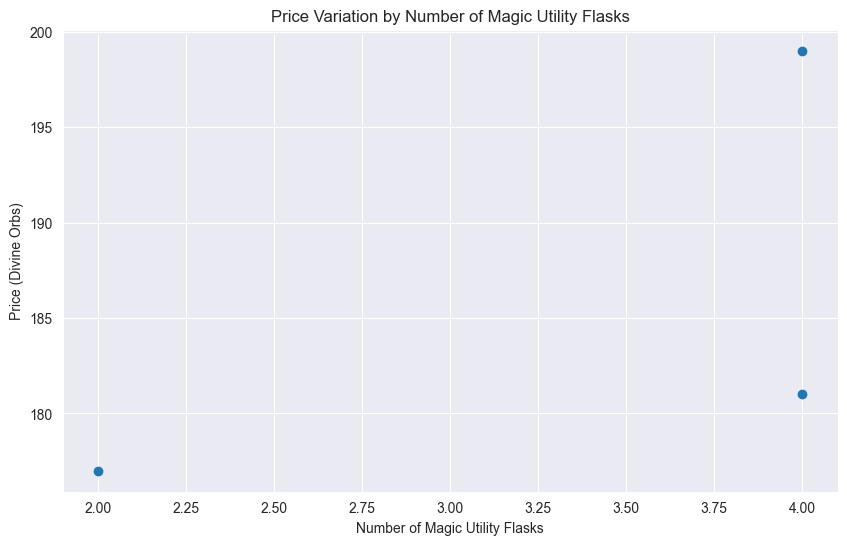

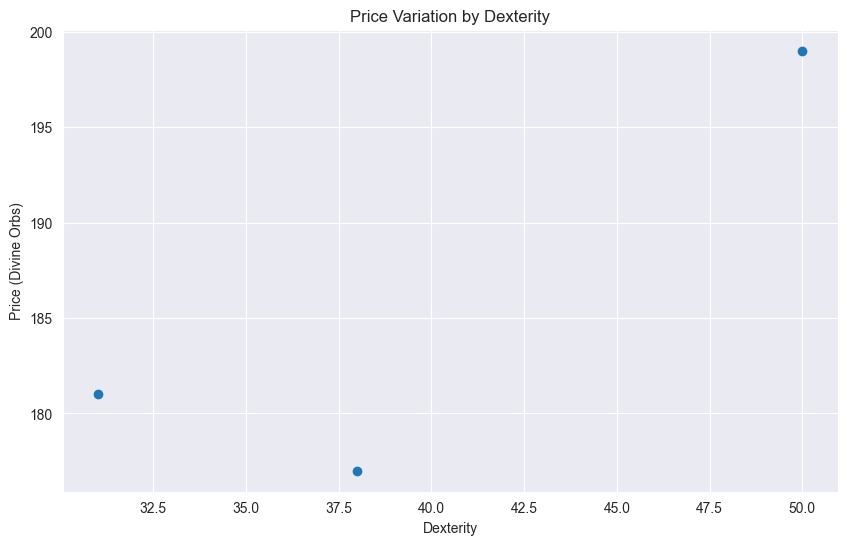

In [4]:
def plot_price_variation(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Magic Utility Flasks'], df['Price (Divine Orbs)'])
    plt.xlabel('Number of Magic Utility Flasks')
    plt.ylabel('Price (Divine Orbs)')
    plt.title('Price Variation by Number of Magic Utility Flasks')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(df['Dexterity'], df['Price (Divine Orbs)'])
    plt.xlabel('Dexterity')
    plt.ylabel('Price (Divine Orbs)')
    plt.title('Price Variation by Dexterity')
    plt.show()

plot_price_variation(df)


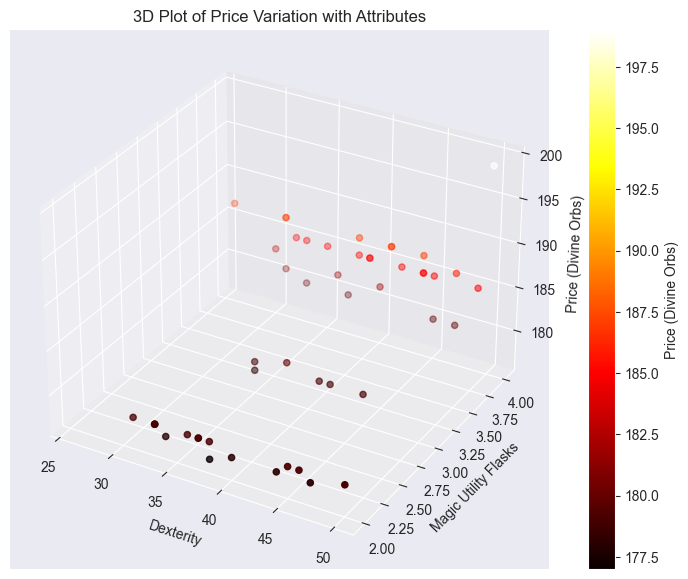

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = {
    'Dexterity': [38, 31, 50, 40, 36, 30, 42, 38, 39, 44, 39, 32, 49, 33, 35, 45, 44, 47, 31, 41, 38, 44, 41, 31, 26, 44, 40, 47, 34, 35, 45, 50, 36, 33, 35, 46, 42, 37, 33, 38, 37, 31, 45, 41, 33, 45, 47, 33, 38, 37],
    'Magic Utility Flasks': [2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 4, 4, 4, 3, 4],
    'Price (Divine Orbs)': [177, 181, 199, 182, 182, 183, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 186, 187, 187, 187, 187, 187, 187, 187, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 180, 180, 180, 180, 180]
}

df = pd.DataFrame(data)

def plot_3d_price_variation(df):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    img = ax.scatter(df['Dexterity'], df['Magic Utility Flasks'], df['Price (Divine Orbs)'], c=df['Price (Divine Orbs)'], cmap=plt.hot())

    ax.set_xlabel('Dexterity')
    ax.set_ylabel('Magic Utility Flasks')
    ax.set_zlabel('Price (Divine Orbs)')
    ax.set_title('3D Plot of Price Variation with Attributes')

    cbar = fig.colorbar(img)
    cbar.set_label('Price (Divine Orbs)')

    plt.show()

plot_3d_price_variation(df)


In [6]:
print("Descriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Dexterity  Magic Utility Flasks  Price (Divine Orbs)
count  50.000000              50.00000            50.000000
mean   38.920000               3.24000           182.180000
std     5.893061               0.91607             4.138865
min    26.000000               2.00000           177.000000
25%    34.250000               2.00000           179.000000
50%    38.000000               4.00000           180.000000
75%    44.000000               4.00000           185.000000
max    50.000000               4.00000           199.000000


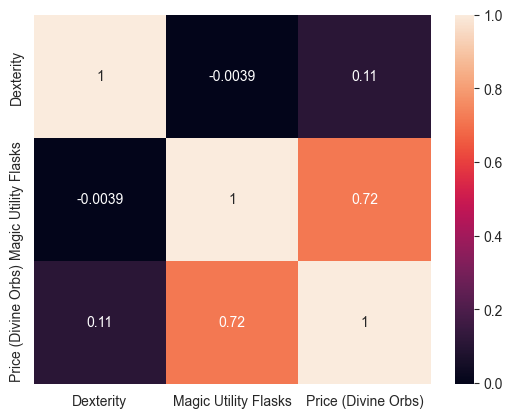

In [7]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


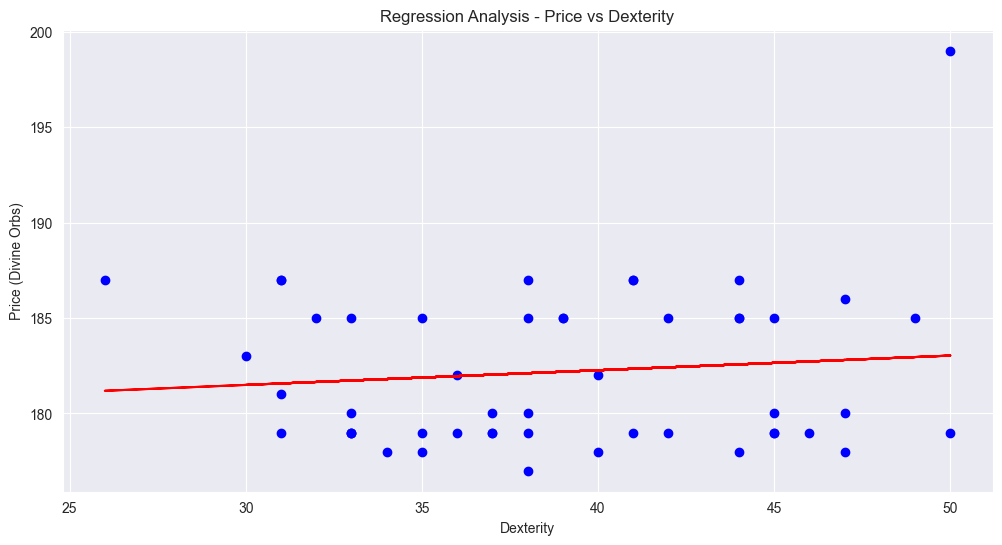

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['Dexterity'].values.reshape(-1,1)
y = df['Price (Divine Orbs)'].values

model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(12, 6))  
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Dexterity')
plt.ylabel('Price (Divine Orbs)')
plt.title('Regression Analysis - Price vs Dexterity')
plt.show()


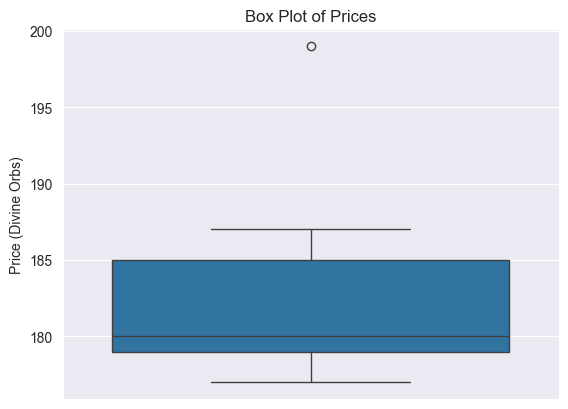

In [9]:
sns.boxplot(y=df['Price (Divine Orbs)'])
plt.title('Box Plot of Prices')
plt.show()


In [10]:
from scipy import stats

df['z_score_price'] = np.abs(stats.zscore(df['Price (Divine Orbs)']))
anomalies = df[df['z_score_price'] > 3]
print("Anomalies:\n", anomalies)


Anomalies:
    Dexterity  Magic Utility Flasks  Price (Divine Orbs)  z_score_price
2         50                     4                  199       4.105175
